# BUSINESS ANALYTICS TASK (RETAIL STORE)
TO STUDY THE DATA AND GIVE SOLUTIONS TO INCREASE THE PROFIT 

### Tasks :
Perform Exploratory Data Analysis        


● As a business manager, try to find out the weak areas where you can work to make more profit.
          
● What all business problems you can derive by exploring the data?

### AUTHOR - YASHASVI VERMA

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
ds = pd.read_csv('C:\Datasets\SampleSuperstore.csv')

# Exploritary Data Analysis 

In [6]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [160]:
ds.shape

(9994, 13)

In [9]:
ds.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### So the elements we have here are :  
1. Ship Mode   
2. Segment  
3. Country  
4. City  
5. State  
6. Postal Code  
7. Region  
8. Category  
9. Sub-Category  
10. Sales  
11. Quantity  
12. Discount  
13. Profit  

## Ship Mode

In [10]:
ds['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

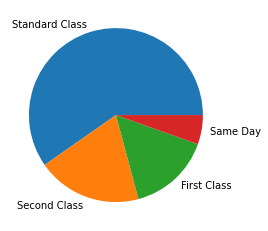

In [11]:
y = ds['Ship Mode'].value_counts()
plt.pie(y, labels = y.index)
plt.show()

In [12]:
Shipmode_percentage = [ds['Ship Mode'].value_counts() / len(ds['Ship Mode'])*100] 
Shipmode_percentage

[Standard Class    59.715829
 Second Class      19.461677
 First Class       15.389234
 Same Day           5.433260
 Name: Ship Mode, dtype: float64]

In [13]:
Shipmode = ds.groupby(['Ship Mode'])['Profit'].mean()

array([<AxesSubplot:ylabel='Profit'>], dtype=object)

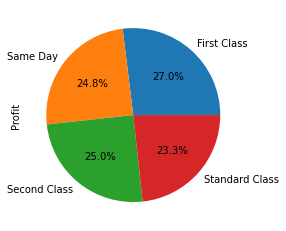

In [14]:
Shipmode.plot.pie(subplots=True, autopct='%1.1f%%', labels = Shipmode.index)

Shipping mode = Standard Class ---> 59.7% , Second Class ---> 19.46% , First Class ---> 15.38% , Same Day ---> 5.43%   
Profit by shipping modes = Standard Class ---> 23.3% , Second Class ---> 25% , First Class ---> 27% , Same Day ---> 25%   
    
PROFIT IS HIGH IN FIRST CLASS 

## Segment

In [16]:
ds['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [17]:
ds.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Home office has High Sales and Profit       

Corporate has high discount

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Segment', ylabel='count'>

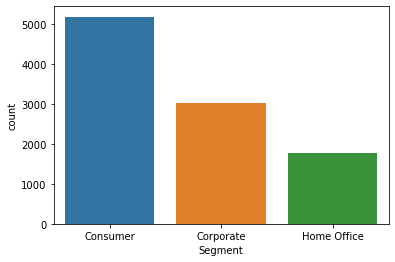

In [23]:
sns.countplot(ds['Segment'])

## Country

In [26]:
ds['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

## City  

In [27]:
ds['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Waterloo             1
Whittier             1
Melbourne            1
Rochester Hills      1
Tinley Park          1
Name: City, Length: 531, dtype: int64

In [144]:
City = ds.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
City = City.sort_values('Profit')
Highest_profit = City['Profit'].tail(20)
Highest_sales = City['Sales'].tail(20)
Highest_disc = City['Discount'].tail(20)

<AxesSubplot:ylabel='Profit'>

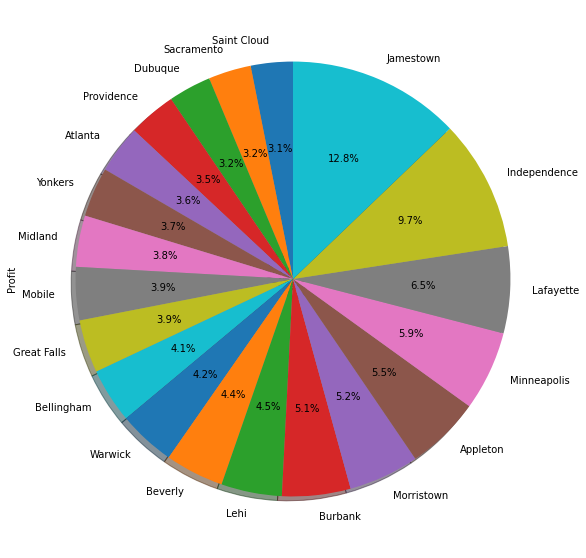

In [145]:
Highest_profit.plot(kind='pie',figsize = (10,10),autopct='%1.1f%%',startangle=90,shadow=True)

<AxesSubplot:ylabel='Sales'>

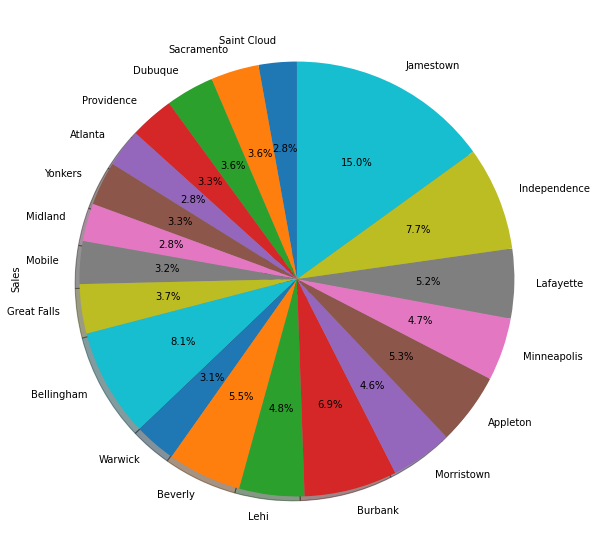

In [146]:
Highest_sales.plot(kind='pie',figsize = (10,10),autopct='%1.1f%%',startangle=90,shadow=True)

In [151]:
Highest_disc

City
Saint Cloud     0.000000
Sacramento      0.123077
Dubuque         0.000000
Providence      0.009677
Atlanta         0.000000
Yonkers         0.066667
Midland         0.008333
Mobile          0.000000
Great Falls     0.050000
Bellingham      0.066667
Warwick         0.000000
Beverly         0.000000
Lehi            0.100000
Burbank         0.066667
Morristown      0.000000
Appleton        0.000000
Minneapolis     0.000000
Lafayette       0.000000
Independence    0.000000
Jamestown       0.000000
Name: Discount, dtype: float64

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='Discount'>

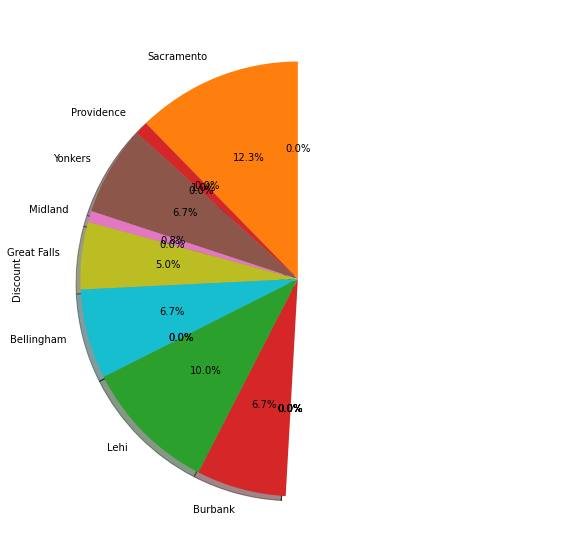

In [149]:
Highest_disc.plot(kind='pie',figsize = (10,10),autopct='%1.1f%%',startangle=90,shadow=True)

TOP 20 CITIES WITH HIGHEST PROFIT, SALES AND DISCOUNTS

## State  

In [49]:
ds['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [66]:
State = ds.groupby(['State'])[['Sales', 'Profit']].mean()
State = State.sort_values('Profit')
State

,Sales,Profit
State,,
Ohio,166.861697,-36.186304
Colorado,176.418231,-35.867351
North Carolina,223.305880,-30.083985
Tennessee,167.551219,-29.189583
Pennsylvania,198.487077,-26.507598
Texas,172.779742,-26.121174
Illinois,162.939230,-25.625787
Arizona,157.508933,-15.303235
Oregon,140.573790,-9.600569


Text(0.5, 1.0, 'State wise analysis of Sale and profit')

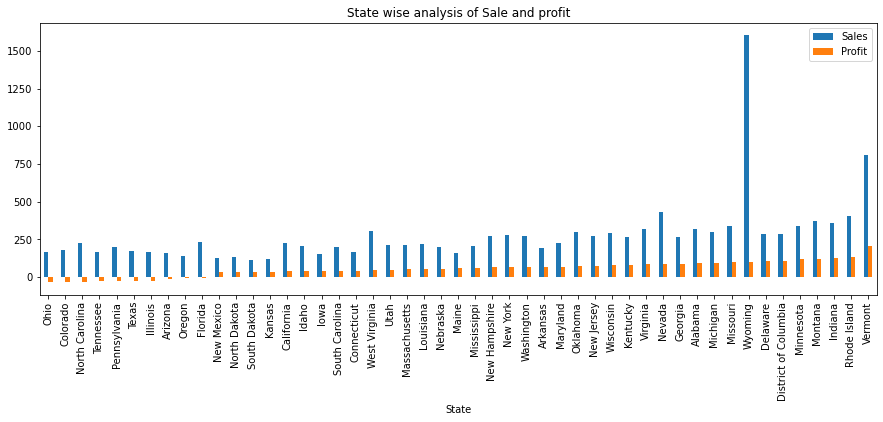

In [60]:
State.plot(kind='bar',figsize=(15,5))
plt.title('State wise analysis of Sale and profit')

Vermont has done the highest profit 

## Region  

In [68]:
ds['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [152]:
Region = ds.groupby(['Region'])['Profit','Discount','Sales'].mean()
Region

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Profit,Discount,Sales
Region,,,
Central,17.092709,0.240353,215.772661
East,32.135808,0.145365,238.336110
South,28.857673,0.147253,241.803645
West,33.849032,0.109335,226.493233


C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Sales'>], dtype=object)

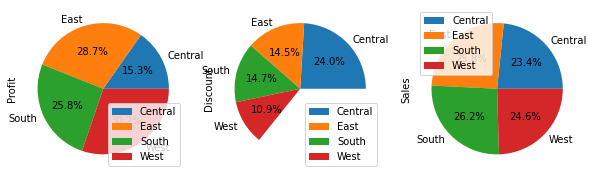

In [153]:
Region.plot.pie(subplots=True, figsize = (10,10), autopct='%1.1f%%', labels = Region.index)

Profit is highest in East 

Sales is highest in South

## Category  

In [74]:
ds['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [95]:
Cat

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<AxesSubplot:ylabel='Profit'>, <AxesSubplot:ylabel='Sales'>],
      dtype=object)

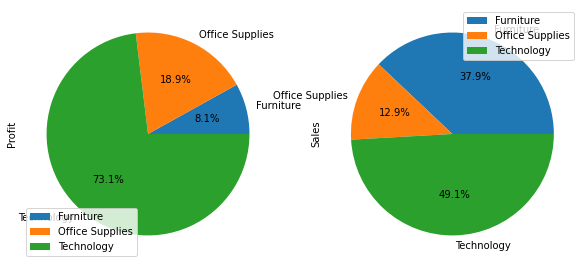

In [105]:
Cat = ds.groupby(['Category'])['Profit','Sales'].mean()
Cat.plot.pie(subplots=True, figsize = (10,10), autopct='%1.1f%%', labels = Cat.index)

Profit and Sales both are highest in Technology and very low in other two

Category
Furniture          0.024867
Office Supplies    0.170352
Technology         0.173957
dtype: float64


C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='None'>], dtype=object)

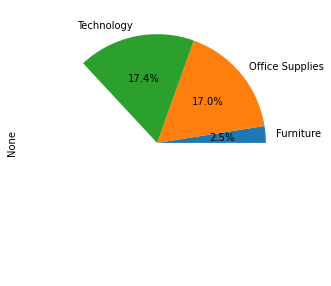

In [108]:
Catavg = ds.groupby(['Category'])['Profit'].mean() / ds.groupby(['Category'])['Sales'].mean()
print(Catavg)
Catavg.plot.pie(subplots=True, figsize = (5,5), autopct='%1.1f%%', labels = Cat.index)

The average sales and profit of Technology is highest and Furniture is lowest 

## Sub-Category  

In [110]:
ds['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Sub-Category'>

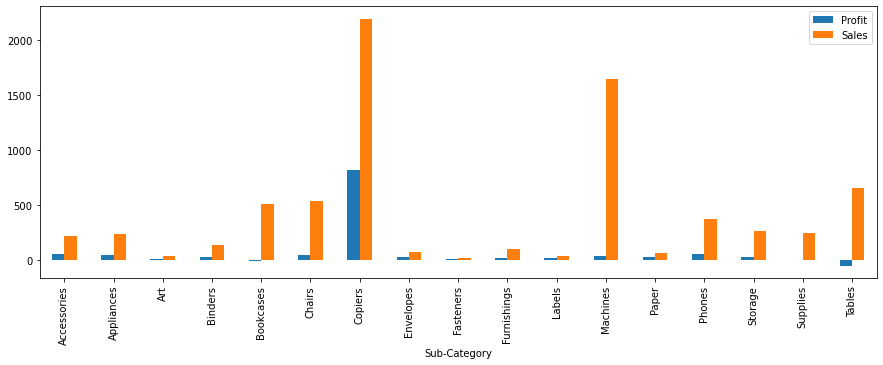

In [157]:
SubCat = ds.groupby(['Sub-Category'])['Profit','Sales'].mean()
SubCat.plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='Sub-Category'>

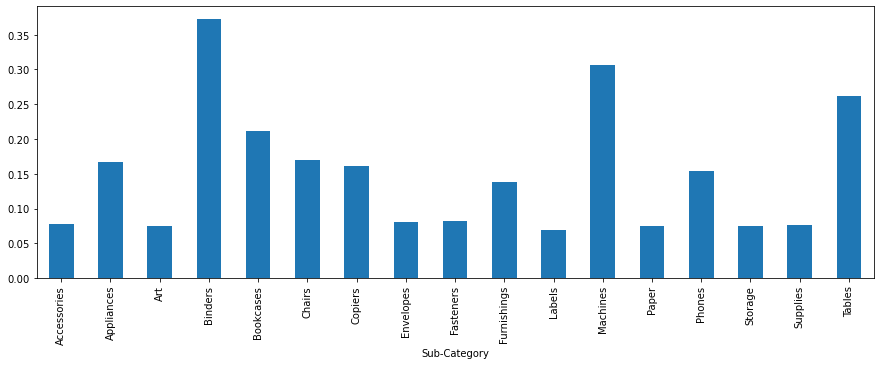

In [158]:
SubCat2 = ds.groupby(['Sub-Category'])['Discount'].mean()
SubCat2.plot(kind='bar',figsize=(15,5))

In [156]:
SubCat

,Profit,Discount,Sales
Sub-Category,,,
Accessories,54.111788,0.078452,215.974604
Appliances,38.922758,0.166524,230.755710
Art,8.200737,0.074874,34.068834
Binders,19.843574,0.372292,133.560560
Bookcases,-15.230509,0.211140,503.859633
Chairs,43.095894,0.170178,532.332420
Copiers,817.909190,0.161765,2198.941618
Envelopes,27.418019,0.080315,64.867724
Fasteners,4.375660,0.082028,13.936774


Sales and Profit both are highest in Copiers and lowest in Fastners    
Also there is not profit in Supplies and Tables

## Quantity

In [129]:
ds['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [133]:
Quantity = ds.groupby(['Quantity'])[['Sales', 'Profit']].mean()
Quantity

,Sales,Profit
Quantity,,
1,59.234632,8.276396
2,120.354488,16.006831
3,175.201578,23.667715
4,271.764059,37.131310
5,337.936339,40.257394
6,362.101960,18.051517
7,395.888393,56.579163
8,458.210802,42.244342
9,498.083683,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale and profit')

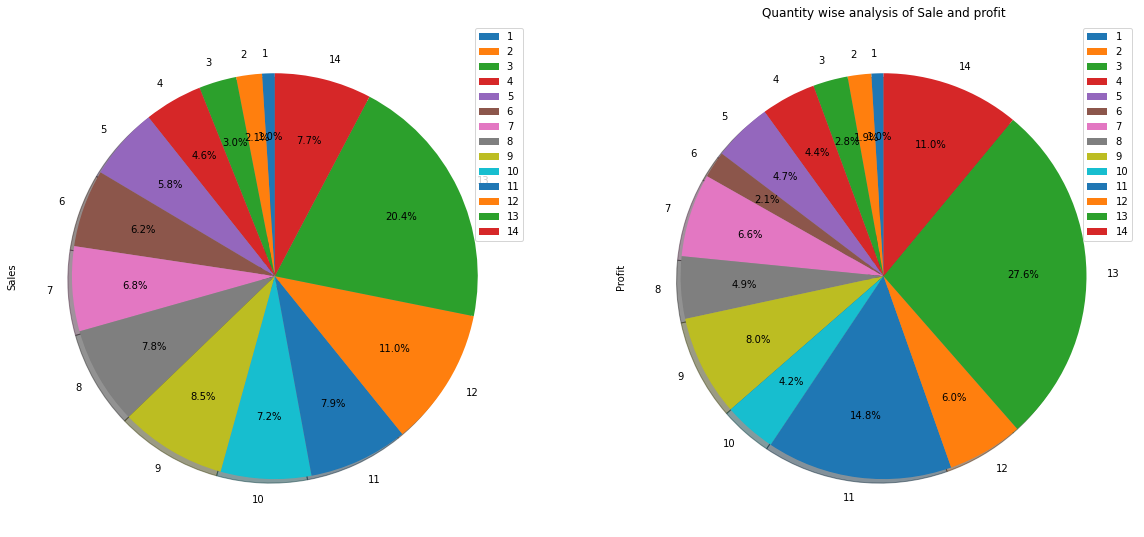

In [134]:
Quantity.plot.pie(subplots=True, autopct='%1.1f%%',figsize=(20, 20),pctdistance=0.69,startangle=90,shadow=True,labels = Quantity.index)     # start angle 90° (Africa)
plt.title('Quantity wise analysis of Sale and profit')

Sales and profit both are mostly higher for larger Quantities       

13 is the highest in both

array([<AxesSubplot:ylabel='None'>], dtype=object)

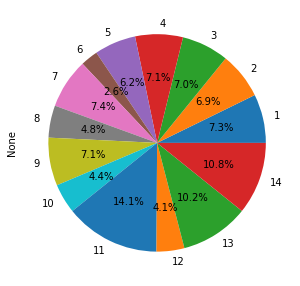

In [136]:
Qavg = ds.groupby(['Quantity'])['Profit'].mean() / ds.groupby(['Quantity'])['Sales'].mean()
Qavg.plot.pie(subplots=True, figsize = (5,5), autopct='%1.1f%%', labels = Quantity.index)

When it comes to the mean of average per quantity 11, 13 and 14 are the highest    
5, 6 are the lowest 

# Some of the observations 

Profit can be increased in certain ways -----  

1. Profit is comparitively higher in first class so if most products are deliverd in first class by giving more discounts and improving the sales, the profit could increase    


2. Home office has high sales and profit, if discount and sales count could also increase for home office the profit would increase


3. The cities with the highest profit and sales are given 0 discount still tops the list


4. By region, discount is highest in the central still profit is lowest, but discount is lowest in the west and profit is still highest so if more discount is given in the west then it may gain more profit


5. The most sales and profit is in technology so it can be used to make more profit


6. Sales and profit both are mostly higher for larger Quantities but there is no big difference in it